In [0]:
import nltk

## Carga de datos
---

In [2]:
nltk.download('book') # Corpus de libros en ingles

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package dependency_treebank is already up-to-date!
[nltk_data]    | Downloadi

True

In [3]:
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [4]:
text1

<Text: Moby Dick by Herman Melville 1851>

In [5]:
text1.tokens[:10] # 10 primeros tokens

['[',
 'Moby',
 'Dick',
 'by',
 'Herman',
 'Melville',
 '1851',
 ']',
 'ETYMOLOGY',
 '.']

In [6]:
print(len(text1)) # Numero de tokens

260819


## Riqueza léxica
---

In [7]:
vocabulario = sorted(set(text1))
print(vocabulario[1000:1010])

['Crew', 'Crish', 'Crockett', 'Cross', 'Crossed', 'Crossing', 'Crotch', 'Crowding', 'Crown', 'Crozetts']


In [8]:
# Riqueza léxica = rl
rl = len(vocabulario)/len(text1)
print(rl)

0.07406285585022564


In [0]:
def riqueza_lexica(texto) -> float:
  vocabulario = sorted(set(texto))
  return len(vocabulario) / len(texto)

In [0]:
def porcentaje_palabra(palabra, texto) -> float:
  return 100 * texto.count(palabra) / len(texto)

# .count(string) cuenta cuantas veces aparece el string en el corpus tokenizado

In [11]:
porcentaje_palabra('monster', text1)

0.018786974875296663

In [12]:
text1.count('monster')

49

## Estadística del lenguaje
---

In [0]:
# dic = {palabra: text1.count(palabra) for palabra in text1}
# Poco recomendable por ser constoso de calcular

### Método FreqDist en NLTK

In [0]:
fdist = FreqDist(text1)

In [15]:
fdist.most_common(20)

[(',', 18713),
 ('the', 13721),
 ('.', 6862),
 ('of', 6536),
 ('and', 6024),
 ('a', 4569),
 ('to', 4542),
 (';', 4072),
 ('in', 3916),
 ('that', 2982),
 ("'", 2684),
 ('-', 2552),
 ('his', 2459),
 ('it', 2209),
 ('I', 2124),
 ('s', 1739),
 ('is', 1695),
 ('he', 1661),
 ('with', 1659),
 ('was', 1632)]

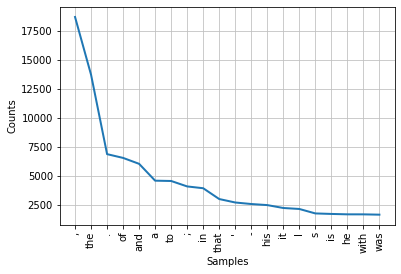

In [16]:
fdist.plot(20)

In [17]:
fdist['monster']

49

## Distribuciones sobre contenido con filtro-fino
---

In [18]:
long_words = [palabra for palabra in text1 if len(palabra)>5]
vocabulario_filtrado = sorted(set(long_words))
vocabulario_filtrado[:5]

['ACCOUNT', 'ADDITIONAL', 'ADVANCING', 'ADVENTURES', 'AFFGHANISTAN']

In [19]:
palabras_interesantes = [(palabra, fdist[palabra]) for palabra in set(text1) if len(palabra)>5 and fdist[palabra]>10]
palabras_interesantes[:5]

[('country', 25),
 ('passage', 32),
 ('straits', 11),
 ('mortal', 39),
 ('repose', 11)]

In [0]:
dtypes = [('word', 'S10'), ('frequency', int)]
palabras_interesantes = np.array(palabras_interesantes, dtype=dtypes)

In [0]:
palabras_interesantes = np.sort(palabras_interesantes, order='frequency')

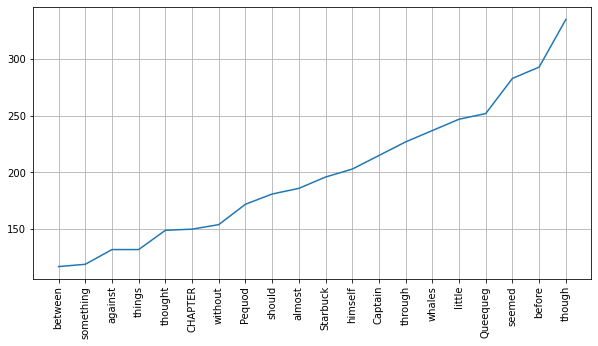

In [22]:
top_words = 20

x = np.arange(len(palabras_interesantes[-top_words:]))
y = [freq[1] for freq in palabras_interesantes[-top_words:]]

plt.figure(figsize=(10, 5))

plt.plot(x, y)
plt.grid(True)

plt.xticks(x, [str(freq[0], encoding='UTF-8') for freq in palabras_interesantes[-top_words:]], rotation='vertical')

plt.show()

# Lenguaje
---

### Configuración

In [0]:
import nltk
nltk.download('book')
from nltk.book import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px

## Bi-gramas

In [0]:
md_bigrams = list(bigrams(text1))
fdist = FreqDist(md_bigrams)

In [27]:
fdist.most_common(5)

[((',', 'and'), 2607),
 (('of', 'the'), 1847),
 (("'", 's'), 1737),
 (('in', 'the'), 1120),
 ((',', 'the'), 908)]

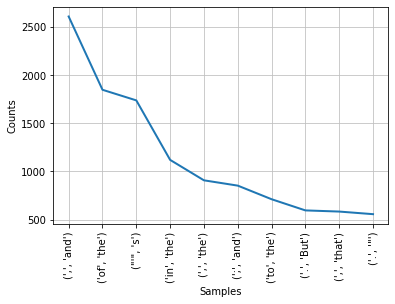

In [29]:
fdist.plot(10)

### Filtrado de bi-gramas

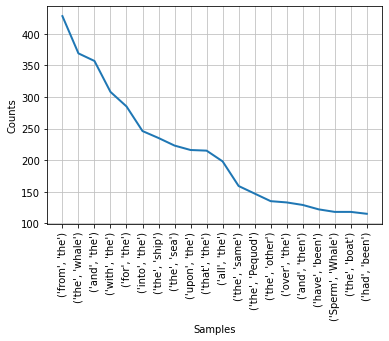

In [31]:
threshold = 2
filtered_bigrams = [bigram for bigram in md_bigrams if len(bigram[0]) > threshold and len(bigram[1]) > threshold]
filtered_dist = FreqDist(filtered_bigrams)

filtered_dist.plot(20)

## Tri-gramas

In [34]:
from nltk.util import ngrams
md_trigrams = list(ngrams(text1, 3))
fdist = FreqDist(md_trigrams)

fdist.most_common(5)

[((',', 'and', 'the'), 187),
 (('don', "'", 't'), 103),
 (('of', 'the', 'whale'), 101),
 ((',', 'in', 'the'), 93),
 ((',', 'then', ','), 87)]

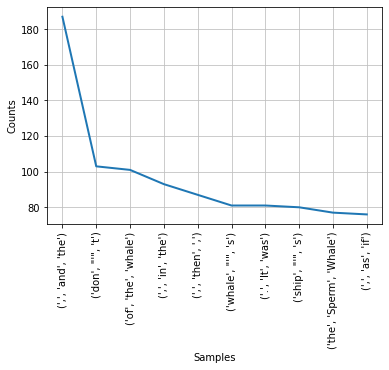

In [35]:
fdist.plot(10)